# Small world networks

What is the problem with random networks as a model for real-world networks according to the argument in section 3.5?

All nodes in the network will have almost the same degree, hence there is no popular or unpopular individuals. This means there are a lot fewer shortcuts around the network.
Real networks are much more clustered.

## Regimens in random networks

All of these are defined in terms of $\langle k \rangle$

- **Subcritical regime**: $0 < \langle k \rangle < 1$ (also meaning $p < 1/N$)
- **Critical point**: $\langle k \rangle = 1$ ($p = 1/N$)
- **Supercritical regime**: $\langle k \rangle > 1$ ($p > 1/N$)
- **Connected regime**: $\langle k \rangle > \ln{N}$ ($p > \ln{N} / N$)


According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

The clustering coefficient is independent of the nodes' degrees and instead are only dependent on the size of the system ($1/N$).
For real networks it is the other way around, being dependent on the individual nodes and largely independent from the system size.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy as np

In [10]:
N = 500
k_mean = 4
p = [0, 0.1, 1]

# Generating the three graphs
G = [nx.watts_strogatz_graph(N, k_mean, x) for x in p]

### The *average shortest path length* of the four networks

In [12]:
lengths = [nx.average_shortest_path_length(g) for g in G]
print(lengths)

[62.875751503006015, 7.603462925851703, 4.7582364729458915]


When the probability increases, the average shortest path length goes down.
This makes perfect sense as there are more edges in the network, hence more paths between each node pair.

In [23]:
for p in np.linspace(0.1, 1, 10):
    g = nx.watts_strogatz_graph(N, k_mean, p)
    d_mean = nx.average_shortest_path_length(g)
    print('p: %.1f' % p, 'd_mean: %.5f' % d_mean)

p: 0.1 d_mean: 7.79065
p: 0.2 d_mean: 6.19986
p: 0.3 d_mean: 5.63638
p: 0.4 d_mean: 5.21101
p: 0.5 d_mean: 4.98747
p: 0.6 d_mean: 4.92623
p: 0.7 d_mean: 4.79584
p: 0.8 d_mean: 4.77365
p: 0.9 d_mean: 4.76183
p: 1.0 d_mean: 4.76635


The average shortest path length for these networks approaches a fully random network around $p = 0.5$, where the difference is only $0.25$.
Its gets even closer around $p = 0.7$, where the difference is only $0.03$

In [27]:
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

G = []
for x in p: 
    G.append([nx.watts_strogatz_graph(N, k_mean, x) for _ in range(50)])


The calculations below are a bit time consuming, hence why each is done by itself to allow only to run at a time

In [32]:
ds = []

In [35]:
ds.append([nx.average_shortest_path_length(g) for g in G[0]])

In [36]:
ds.append([nx.average_shortest_path_length(g) for g in G[1]])

In [37]:
ds.append([nx.average_shortest_path_length(g) for g in G[2]])

In [38]:
ds.append([nx.average_shortest_path_length(g) for g in G[3]])

In [39]:
ds.append([nx.average_shortest_path_length(g) for g in G[4]])

In [40]:
ds.append([nx.average_shortest_path_length(g) for g in G[5]])

In [41]:
means = []
stds = []

for i, d  in enumerate(ds):
    mean = np.mean(d)
    std = np.std(d)
    means.append(mean)
    stds.append(std)
    print(i, 'Mean: %.5f' % mean, 'STD: %.5f' % std)

0 Mean: 62.87575 STD: 0.00000
1 Mean: 24.41895 STD: 5.16209
2 Mean: 13.21220 STD: 1.34608
3 Mean: 10.26109 STD: 0.80007
4 Mean: 7.65380 STD: 0.24668
5 Mean: 6.14136 STD: 0.12762


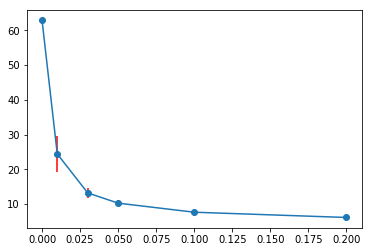

In [55]:
plt.errorbar(p, means, yerr=stds, fmt='-o', ecolor='red')
plt.show()